#Introduction

.....


In [1]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [2]:
!which python

/Users/claudio/opt/anaconda3/envs/social_media_env/bin/python


# Install dependencies:

In [3]:
install_packages = True
if install_packages:
    !conda install tensorflow=2 -y
    !conda install -c anaconda pandas -y
    !conda install -c conda-forge tensorflow-hub -y
    !conda install -c akode html2text -y
    !conda install -c conda-forge tqdm -y
    !conda install -c anaconda scikit-learn -y
    !conda install -c conda-forge matplotlib -y
    !conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/claudio/opt/anaconda3/envs/social_media_env

  added / updated specs:
    - tensorflow=2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.11.0             |   py36hecd8cb5_0         169 KB
    astor-0.8.1                |           py36_0          46 KB
    c-ares-1.17.1              |       h9ed2024_0          92 KB
    gast-0.2.2                 |           py36_0    

pandas-1.1.3         | 10.1 MB   | ##################################### | 100% 
pytz-2020.1          | 239 KB    | ##################################### | 100% 
ca-certificates-2020 | 127 KB    | ##################################### | 100% 
openssl-1.1.1h       | 3.4 MB    | ##################################### | 100% 
certifi-2020.6.20    | 159 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/claudio/opt/anaconda3/envs/social_media_env

  added / updated specs:
    - tensorflow-hub


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certific

libpng-1.6.37        | 313 KB    | ##################################### | 100% 
openssl-1.1.1h       | 1.9 MB    | ##################################### | 100% 
freetype-2.10.4      | 897 KB    | ##################################### | 100% 
cycler-0.10.0        | 9 KB      | ##################################### | 100% 
matplotlib-2.2.5     | 7 KB      | ##################################### | 100% 
matplotlib-base-2.2. | 6.6 MB    | ##################################### | 100% 
kiwisolver-1.3.0     | 53 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/claudio/opt/anaconda3/envs/social_media_env

  added / updated specs:
    - seaborn


The 

# Imports

In [4]:
#imports
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
import zipfile
from html2text import HTML2Text
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas print options
This will improve readability of printed pandas dataframe.


In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

data_path: In this path put the data you have downloaded with YouTube Data Tools. 

output_path: Tghe files generated in this notebook will be saved here.

url_dict: URLs to models on Tensorflow hub are saved here. Other models are available there.

model_type: Define which model you would like to use. Choose one from url_dict

new_embeddings: If this is true, new embeddings will be generated and saved at output_path. Otherwise, embeddings are loaded from Disc.




In [14]:
data_path = './data/comments.csv'
output_path = "./output/"

new_embeddings = True

url_dict = {
            'Transformer' : "https://tfhub.dev/google/universal-sentence-encoder-large/5",
            'DAN' : "https://tfhub.dev/google/universal-sentence-encoder/4",
            'Transformer_Multilingual': "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
}

model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

## Create output directory
Try to create the directory defined by output_path

In [15]:
try:
   os.mkdir(output_path)
except OSError:
  print ("Creation of the directory %s failed" % output_path)
else:
  print ("Successfully created the directory %s " % output_path)


Creation of the directory ./output/ failed


# Load Data
Load you data as a pandas dataframe

In [26]:
if new_embeddings:
    data = pd.read_csv(data_path,sep='\t',header=(0))

In [27]:
data.head()

,id,replyCount,likeCount,publishedAt,authorName,text,authorChannelId,authorChannelUrl,isReply,isReplyTo,isReplyToName
0,UgzHwhq719UUTk3unyJ4AaABAg,0.0,0,2020-11-11 22:55:50,Liya Archer,Climate change is based on pseudo science. It's natural. We are just warming up- recovering from the ice age. There was a medieval warming period as well. It was cyclical. My godfather who works at NASA said so but says he won't take a public stance on it because it's a political agenda and he will be blackballed.,UCd4HHRvzw5piWwHbv_yzdTA,http://www.youtube.com/channel/UCd4HHRvzw5piWwHbv_yzdTA,0,NaN,NaN
1,UgxKRz93G8brV0CJVLN4AaABAg,0.0,0,2020-05-20 18:54:00,Ma- c C,"more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent",UCUrDMNsy_CHK7nvzdMFhnHA,http://www.youtube.com/channel/UCUrDMNsy_CHK7nvzdMFhnHA,0,NaN,NaN
2,Ugzfqa80D7hd9PjiGKB4AaABAg,0.0,1,2020-03-30 22:58:12,Al L,CBS is BS News,UCXnsM2dp4ppaaqNN2Mw9Qow,http://www.youtube.com/channel/UCXnsM2dp4ppaaqNN2Mw9Qow,0,NaN,NaN
3,UgwalArQKrSeN49iYXJ4AaABAg,0.0,3,2020-01-15 17:00:38,Fedor Ilyin,"The climate is warming, but 1) it's may be a natural process we just make faster a bit 2) it's good for us because the previous periods of prosperity of human civilization were the warm ones. And it's obviously good for plants. And we depend on plants. Every other species depends on plants.",UC3SJ1poSrchkLJLWFQBrJuw,http://www.youtube.com/channel/UC3SJ1poSrchkLJLWFQBrJuw,0,NaN,NaN
4,Ugxe2hSX5JBIieHfGEJ4AaABAg,2.0,1,2020-01-15 09:10:59,Scherbenjongleur,"&quot;cold weather kills more people than warm weather&quot;... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer",UCPUFxnt7qCM7jpq6D7mRczg,http://www.youtube.com/channel/UCPUFxnt7qCM7jpq6D7mRczg,0,NaN,NaN


# Preprocessing
Preprocess your data:
- Drop empty rows
- Drop unused columns

In [28]:
if new_embeddings:
    data = data.dropna(subset=['text', 'authorName']) # drop rows with no content
    data=data.drop(['id', 'replyCount','likeCount','authorChannelUrl','authorChannelId','isReplyTo','isReplyToName'],axis=1) # drop unused columns
data.head()

,publishedAt,authorName,text,isReply
0,2020-11-11 22:55:50,Liya Archer,Climate change is based on pseudo science. It's natural. We are just warming up- recovering from the ice age. There was a medieval warming period as well. It was cyclical. My godfather who works at NASA said so but says he won't take a public stance on it because it's a political agenda and he will be blackballed.,0
1,2020-05-20 18:54:00,Ma- c C,"more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent",0
2,2020-03-30 22:58:12,Al L,CBS is BS News,0
3,2020-01-15 17:00:38,Fedor Ilyin,"The climate is warming, but 1) it's may be a natural process we just make faster a bit 2) it's good for us because the previous periods of prosperity of human civilization were the warm ones. And it's obviously good for plants. And we depend on plants. Every other species depends on plants.",0
4,2020-01-15 09:10:59,Scherbenjongleur,"&quot;cold weather kills more people than warm weather&quot;... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer",0


- remove HTML-tags, links and usernames

In [29]:
if new_embeddings:
    # Remove HTML tags
    tqdm.pandas()
    h = HTML2Text()
    h.ignore_links = True
    data['cleaned'] = data['text'].progress_apply(lambda x: h.handle(x))
    print( "Removed HTML Tags.")

    # Remove links
    http_link_pattern = r'http\S+'
    bitly_link_pattern = r'bit.ly/\S+'
    data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace('\n', ' ')
    print( "Removed Links.")

    # Remove user names
    keep_names = ["earth", "Tide", "Geologist", "A Person", "Titanic", "adventure", "Sun", "The United States Of America"] # user names we want to keep
    user_names = [name for name in data['authorName'].unique() if (len(name)> 3 and name not in keep_names)]
    data['cleaned'] = data['cleaned'].str.replace('|'.join(map(re.escape, user_names)), '')
    print( "Removed user names.")

100%|██████████| 74/74 [00:00<00:00, 3756.88it/s]

Removed HTML Tags.
Removed Links.
Removed user names.


# Save or Load preprocessed data

Save your data afte preprocessing, or load preprocessed data from disc.

In [30]:
if new_embeddings:
  data.to_pickle(output_path+'data_preprocessed'+'.pkl')
else:
  data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
data.head()

,publishedAt,authorName,text,isReply,cleaned
0,2020-11-11 22:55:50,Liya Archer,Climate change is based on pseudo science. It's natural. We are just warming up- recovering from the ice age. There was a medieval warming period as well. It was cyclical. My godfather who works at NASA said so but says he won't take a public stance on it because it's a political agenda and he will be blackballed.,0,Climate change is based on pseudo science. It's natural. We are just warming up- recovering from the ice age. There was a medieval warming period as well. It was cyclical. My godfather who works at NASA said so but says he won't take a public stance on it because it's a political agenda and he will be blackballed.
1,2020-05-20 18:54:00,Ma- c C,"more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent",0,"more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent"
2,2020-03-30 22:58:12,Al L,CBS is BS News,0,CBS is BS News
3,2020-01-15 17:00:38,Fedor Ilyin,"The climate is warming, but 1) it's may be a natural process we just make faster a bit 2) it's good for us because the previous periods of prosperity of human civilization were the warm ones. And it's obviously good for plants. And we depend on plants. Every other species depends on plants.",0,"The climate is warming, but 1) it's may be a natural process we just make faster a bit 2) it's good for us because the previous periods of prosperity of human civilization were the warm ones. And it's obviously good for plants. And we depend on plants. Every other species depends on plants."
4,2020-01-15 09:10:59,Scherbenjongleur,"&quot;cold weather kills more people than warm weather&quot;... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer",0,"""cold weather kills more people than warm weather""... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer"


# Produce Text Embeddings with Universal Sentence Encoder

## Load Model
Load the model from TF-hub

In [21]:
hub_url = url_dict[model_type]
if new_embeddings:
  print("Loading model. This will take some time...")
  embed = hub.load(hub_url)

Loading model. This will take some time...


## Embed Documents
Produce embeddings of your documents.

In [31]:
if new_embeddings:
    for k,g in data.groupby(np.arange(len(data))//200):
        if k == 0:
            embeddings = embed(g['cleaned'])
        else:
            embeddings_new = embed(g['cleaned'])
            embeddings = tf.concat(values=[embeddings,embeddings_new],axis = 0)
            print(k , end =" ")
    print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

    np.save(output_path+'/embeddings'+model_type+'.npy', embeddings, allow_pickle=True, fix_imports=True)
else:
    embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

embeddings.shape

The embeddings vector is of fixed length 512


TensorShape([74, 512])

## Calculate Similarity Matrix with angular distance

'Following Cer et al. (2018), we first compute
the sentence embeddings u, v for an STS sentence
pair, and then score the sentence pair similarity
based on the angular distance between the two
embedding vectors  d = − arccos (uv/||u|| ||v||).'

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity
cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 0.9999999   0.33069384  0.15366054 ...  0.44221067  0.35007095
   0.0347659 ]
 [ 0.33069384  1.0000005   0.15349221 ...  0.37013224  0.5375413
  -0.02830502]
 [ 0.15366054  0.15349221  1.         ...  0.02611669  0.09606026
   0.01018552]
 ...
 [ 0.44221067  0.37013224  0.02611669 ...  0.99999994  0.3635851
  -0.00961032]
 [ 0.35007095  0.5375413   0.09606026 ...  0.3635851   0.99999994
   0.01143746]
 [ 0.0347659  -0.02830502  0.01018552 ... -0.00961032  0.01143746
   1.0000001 ]]


# Plots Similarity 
Plot and print a heat map showing the semantic contextual similarity between comments.

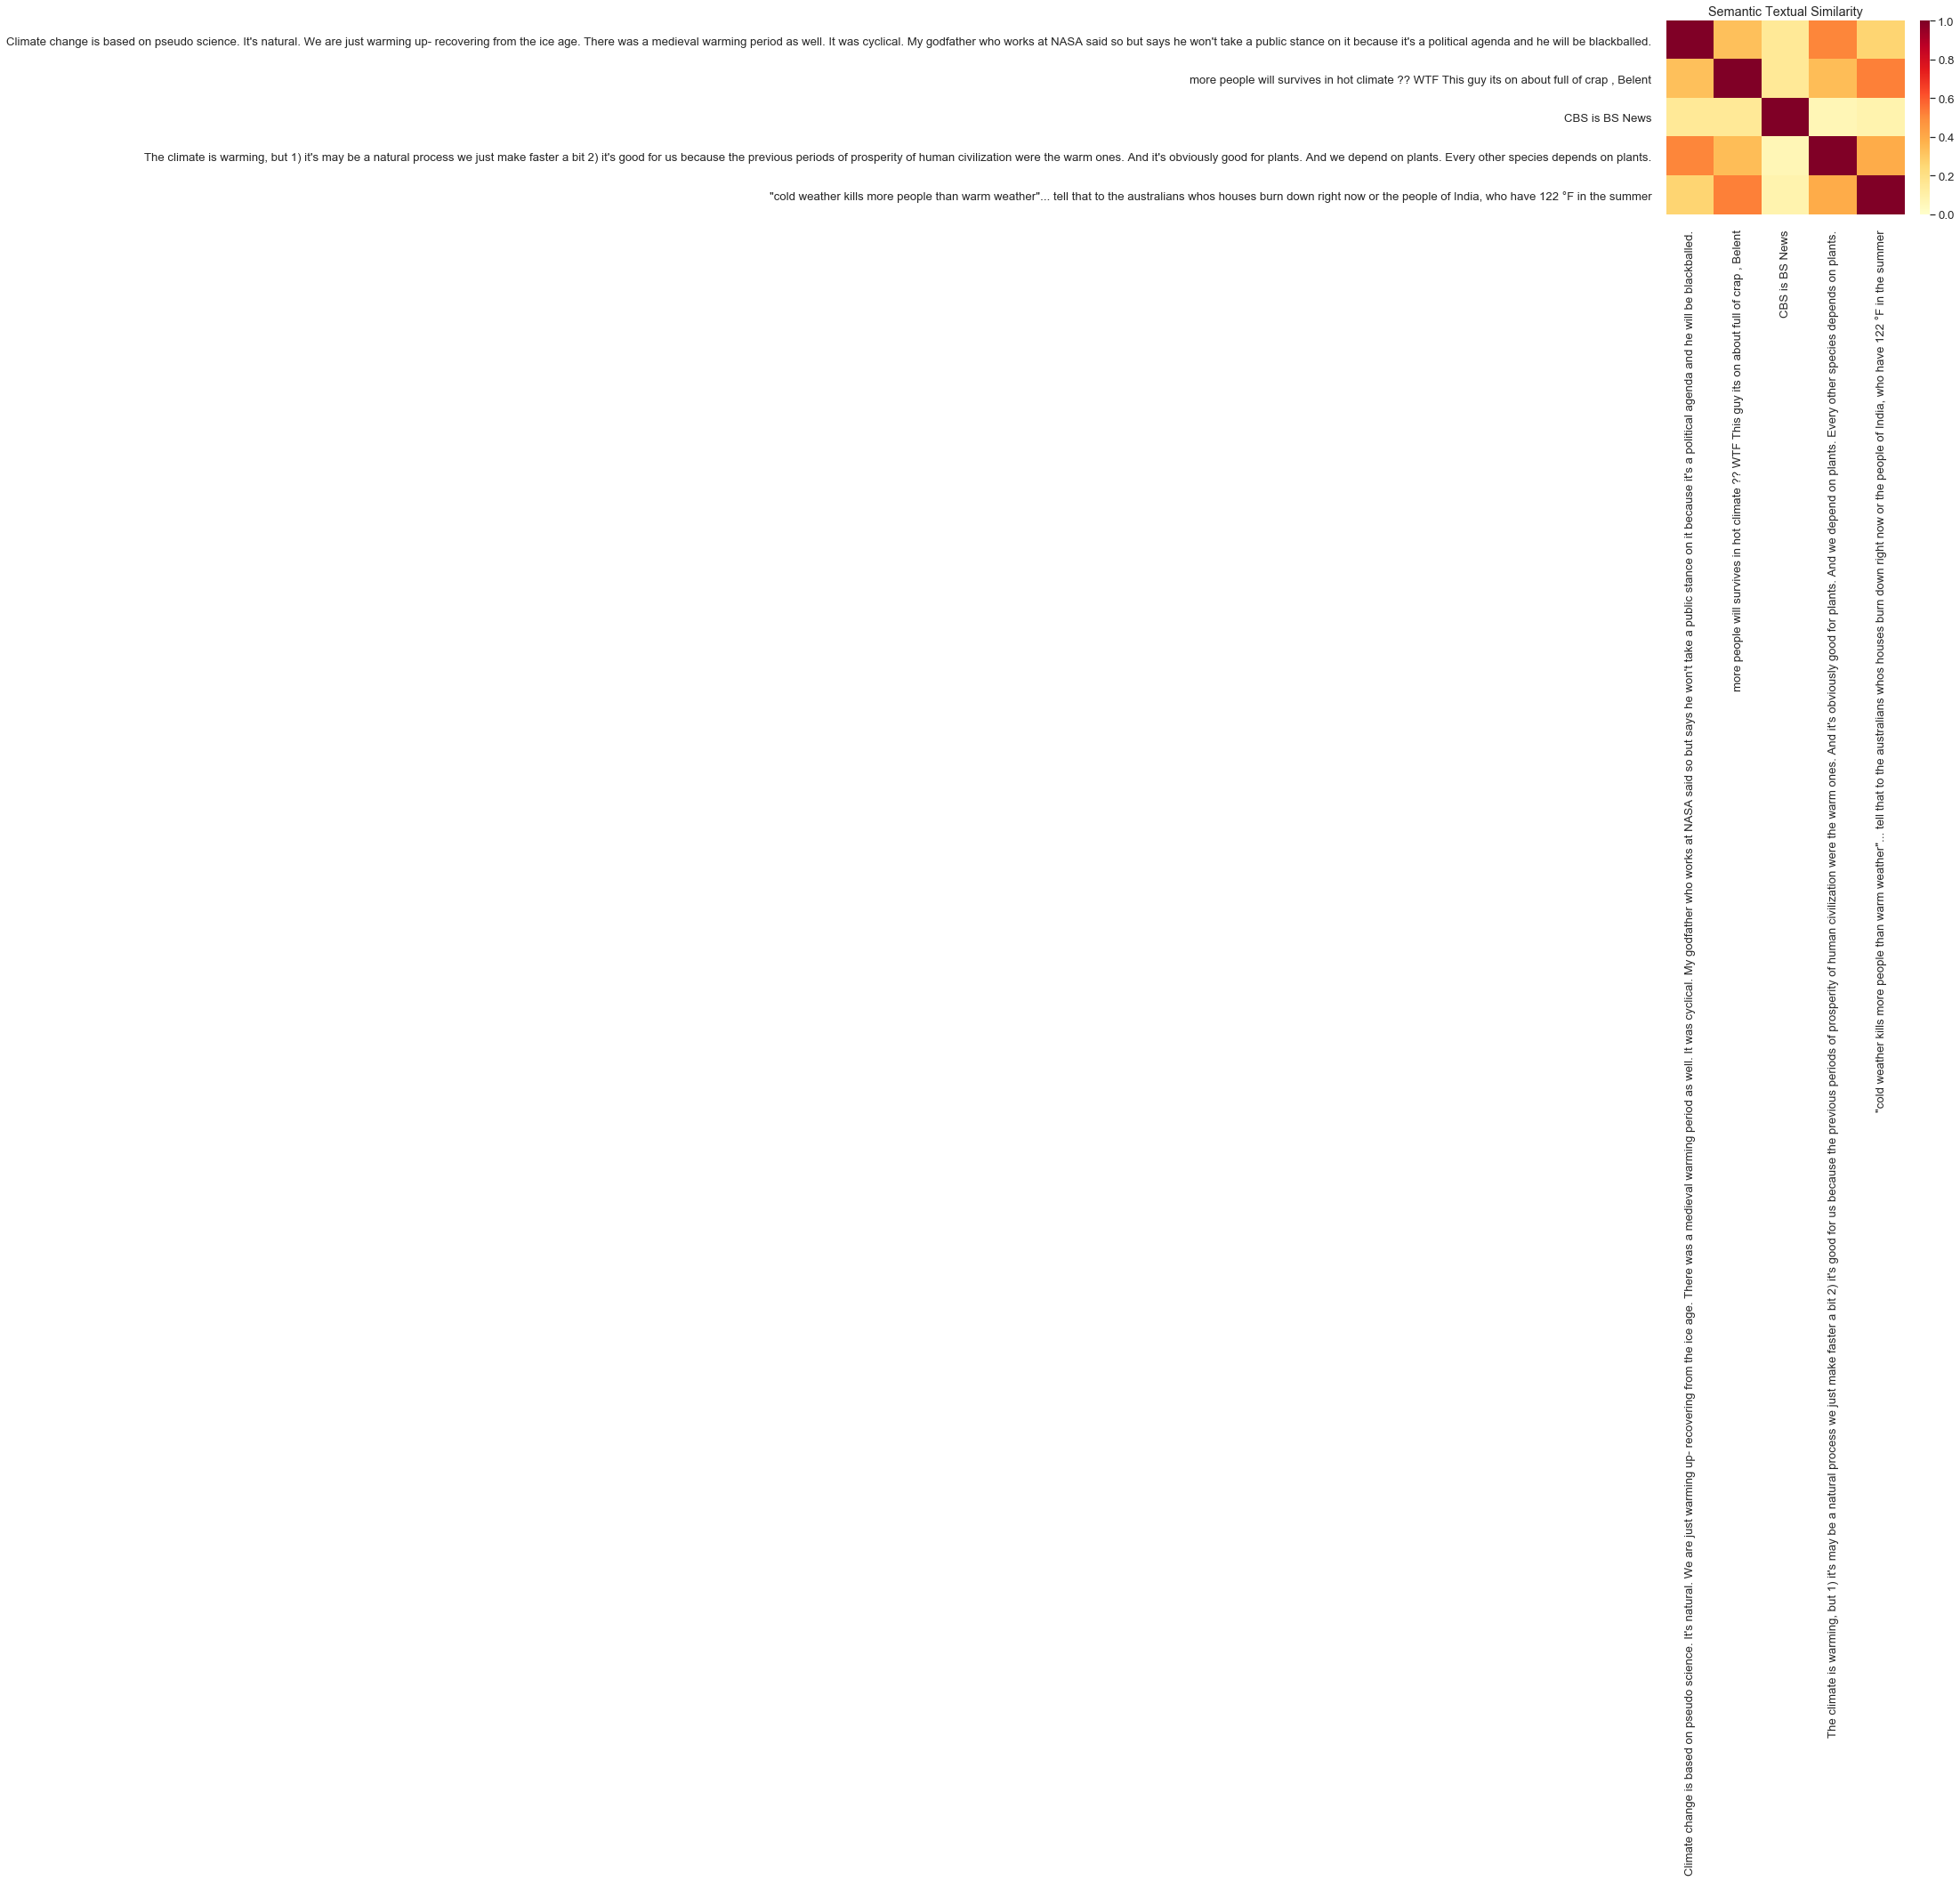

In [48]:
import seaborn as sns
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

num_samples = 5
off_set = 0

plot_similarity(data.iloc[off_set:off_set+num_samples]['cleaned'], embeddings[off_set:off_set+num_samples], 90)

# Show neighbours of a comment 
Define which comment to analyze

In [50]:
# print all comments with index:

for index, comment in enumerate(data["cleaned"]):
    print(index, " - ", comment)
    print("")

0  -  Climate change is based on pseudo science. It's natural. We are just warming up- recovering from the ice age. There was a medieval warming period as well. It was cyclical. My godfather who works at NASA said so but says he won't take a public stance on it because it's a political agenda and he will be blackballed.  

1  -  more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent  

2  -  CBS is BS News  

3  -  The climate is warming, but 1) it's may be a natural process we just make faster a bit 2) it's good for us because the previous periods of prosperity of human civilization were the warm ones. And it's obviously good for plants. And we depend on plants. Every other species depends on plants.  

4  -  "cold weather kills more people than warm weather"... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer  

5  -  During all of history the cold has killed a lot more then warm we

In [67]:
comment_index = 14
comment = data["cleaned"][comment_index]
comment_list = data["cleaned"].tolist()
print(comment)

Who gave this man a degree  


Print similar comments.

In [68]:
def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [sentence_list[i] for i in indices]


for i, value in enumerate(get_top_similar(comment, comment_list, cosine_similarity_matrix, 20)):
    print("Top similar comment {}: {}".format(i+1, value))
    print("____________")

Top similar comment 1: Who gave this man a degree  
____________
Top similar comment 2: What education does trump have? Did he ever study biology or physics or are we blackmailed by the fossil fuel company`s.  
____________
Top similar comment 3:  I'm not talking about Bill nye( although he is a engineer and a teacher before his fame) Im talking about someone who isn't a anything making claims and being contrasted with scientists. Just. Can't. Do. That 😑  
____________
Top similar comment 4: Remember he is NOT a scientist and many people die every year due to exposure to high heat.  
____________
Top similar comment 5: Shame on you CBS for this BULLSHIT. If a person is not a scientist, he should never be allowed to speak about science, let alone attempt to discredit real science !!!!  
____________
Top similar comment 6: @ college physics, hygrometry. Atmosphere gain CO2, it is a GHG gas that increase slightly the temperature. More a gas is hot, more water it can contain. More water ma